# Review(2)
Thanks for your update. Now the project is accepted! 


Good luck in future learning!

Hello, my name is Ivan Alexeev and I am going to review your project.


There may be some shortcomings in the work that I will ask you to eliminate, you fix them and I check your decisions. You can find my comments in <font color='green'>green</font>, <font color='orange'>orange</font> or <font color='red'>red</font> boxes like this:


<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: if everything is done successfully
</div>


<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
Remark: if I can give some recommendations or additional information
</div>


<div class="alert alert-danger" style="box-shadow: 4px 4px 4px">
Need fixing: if the block requires some corrections. Work can't be accepted with the red comments
</div>


Thank you for taking time to complete this project, I appreciate the amount of work you've done! There are some issues that you need to work on, but overall it is a great start! 


Please, don't delete my comments) 

# General feedback
First of all, it is a great start! You've done an amazing job! I want to highlight your ability to use the python methods separately. It is at the highest level! You also have a great notebook design. Unfortunately, there is a small flaw in the work, it can be easily fixed. All you need is label the graphs.


Good luck! I'll wait for your corrections) 

# ICE Data analysis

**The objective for this analysis is to spot potential big winners and plan advertising campaigns. This will be achieved by following a series of steps to identify patterns that determine whether a game succeeds or not. There will be 6 steps:

Step 1. Open the data file and study the general information

Step 2. Prepare the data

Step 3. Analyze the data

Step 4. Create a user profile for each region

Step 5. Test the following hypotheses:

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Step 6. Form a general conclusion





<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Great introduction!
</div>

## Open the data file and study the general information

In [1]:
import pandas as pd
games = pd.read_csv('/datasets/games.csv')
try:
    display(games.head(10), games.info())
except:
    display('cannot read csv')
#The data is readable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


None

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: It is great that try-except method was used!
</div>

### Conclusion

1) The data is readable and not corrupted

2) There are 11 columns: 6 quantitative, 1 continuous, 4 categorical and 16,715 rows

3) Quantitative: NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score

4) Categorical: Name, Platform, Genre, Rating

5) Continuous: Year_of_Release

6) Data types for all columns look acceptable, except for year which should be converted to int64 type

7) The data is now ready to be preprocessed (duplicates, missing values)

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Great conclusion!
</div>

## Prepare the data

In [2]:
#First, columns need to be in lower case
games = games.rename(columns = {'Name': 'name', 'Platform': 'platform', 
                                'Year_of_Release': 'year_of_release', 'Genre': 'genre', 
                                'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 
                                'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 
                                'Critic_Score': 'critic_score', 'User_Score': 'user_score', 
                                'Rating': 'rating'})
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#Convert year_of_release to int64
games.isna().mean() * 100

report = games.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / games.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
critic_score,8578,0.51
rating,6766,0.40
user_score,6701,0.40
year_of_release,269,0.02
name,2,0.00
genre,2,0.00
platform,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00


**Conclusion 2.1: Missing Values Report**

1) The highest percentage of missing values was critic_score at 51%, more than half

2) Other values such as rating and user_score were high as well (both 40%)

3) Year_of_release is only 2%, however, these missing missing values need to be filled in to convert to int64 type

4) name and genre are negligible.

5) Possible reasons for missing values are that the games were not popular enough to receive ratings and year_of_release, the games could be remasters and the name was not clear enough to decipher between the remaster and the original.

6) Missing values should be filled in because they effect 50% of the data and the lower percentages will also be filled 

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Absolutely correct!
</div>

In [4]:
#Next, checking if any 'None' values exist for categorical data
none_values = games[games == 'None'].sum()

n_one_values = games[games == 'none'].sum()

na_values = games[games == 'NA'].sum()
display(none_values, n_one_values, na_values)

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

**Conclusion 2.2: None values in categorical data are non-existent**

#### Filling in missing values

1) Since there is more than 10% of the data being effected by missing values, using the medians for all the columns is the safest strategy


In [5]:
tbd_report = games[games == 'tbd'].count().to_frame()
tbd_report = tbd_report.rename(columns = {0: 'tbd_count'})
tbd_report['% of total'] = (tbd_report['tbd_count'] / games.shape[0]).round(2)

tbd_report
#tbd effects more than 10% of the data -- median should be used

,tbd_count,% of total
name,0,0.00
platform,0,0.00
year_of_release,0,0.00
genre,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00
other_sales,0,0.00
critic_score,0,0.00
user_score,2424,0.15


<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Good decision!
</div>

**Conclusion 2.3**

1) the amount of tbd's in user_score effects 15% of the data, therefore median should be substitute these values

2) to do this, a seperate df without the tbd rows will be used to calculate the median and then this value will then be used to fill in rows with 'tbd' under 'user_score

In [6]:
no_tbd = games.loc[games['user_score'] != 'tbd']
no_tbd['user_score'] = no_tbd['user_score'].astype('float')

display(games.info(), no_tbd.info())
#rows without 'tbd' were added to no_tbd -- next calculate median

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14291 entries, 0 to 16714
Data columns (total 11 columns):
name               14289 non-null object
platform           14291 non-null object
year_of_release    14070 non-null float64
genre              14289 non-null object
na_sales           14291 non-null float64
eu_sales           14291 non-null float64
jp_sales           14291 n

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


None

None

In [7]:
no_tbd['user_score'] = pd.to_numeric(no_tbd["user_score"], downcast="float")

no_tbd['user_score'].median()
#7.5 will be the representative value used for 'tbd' in 'user_score'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


7.5

In [8]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = 7.5

tbd_report = games[games == 'tbd'].count().to_frame()
display(tbd_report, games.info())
#tbd's have been replaced by 7.5
#user_score still has str type values in it which need to be fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,0
user_score,0


None

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Great!
</div>

In [9]:
#Convert to float using to_numeric for future calculations
games['user_score'] = pd.to_numeric(games['user_score'])
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [10]:
games[['critic_score', 'year_of_release']].median().astype('int')

critic_score         71
year_of_release    2007
dtype: int64

In [11]:
games['critic_score'] = games['critic_score'].fillna(66)
games['year_of_release'] = games['year_of_release'].fillna(2006)
games['year_of_release'] = games['year_of_release'].astype('int') #int for visualization 

games.isnull().sum()
#critic_score and year_of_release are filled, but user_score and rating still need to be filled

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6701
rating             6766
dtype: int64

In [12]:
#filling in the median of 7.5 for user_score
games['user_score'] = games['user_score'].fillna(7.5)
games.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

In [13]:
#Since 'rating' is categorical, the most frequent value will be used for missing values
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [14]:
games['rating'] = games['rating'].fillna('E')
games.isnull().sum()

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [50]:
#Deleting rows with missing values for 'name' and 'genre' as 'N/A' 
games = games.dropna()
games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
Remark: the best solution is to delete this rows. 
</div>

In [16]:
#Calculating total sales for each game

games['total_sales'] = (games['na_sales'] + games['eu_sales'] + games['jp_sales'] + 
                       games['other_sales'])
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,66.0,7.5,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,66.0,7.5,E,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,66.0,7.5,E,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,66.0,7.5,E,28.31


In [17]:
#checking for duplicates
games.duplicated().sum()

0

### Conclusion

1) Columns were changed to all lowercase and there were 0 'None' values in categorical variables

2) The missing values report concluded that since the missing data effected nearly half of the data, medians would be used as the representative value to fill in the data

3) Some games were pending user_score, these values were replaced using the median value found from rows that were not pending (7.5)

4) Rating missing values were replaced with the most common value (mode, E)

5) Names and genre were replaced with a string "N/A" to avoid any complications with data manipulation due to null values

7) The total sales was added to the datafrom calculated from the sum of all sales categories

8) No duplicated rows exist in the dataframe

9) The data is now ready for exploratory analysis

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Perfect!
</div>

## Analyze the data

#### Looking at the number of games released in different years

<function matplotlib.pyplot.show(*args, **kw)>

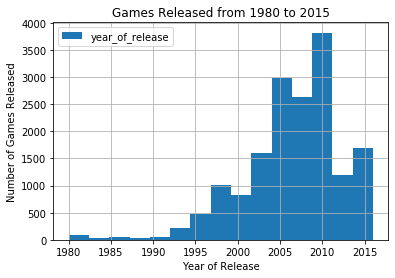

In [18]:
import matplotlib.pyplot as plt

ax = games.plot(kind='hist', y='year_of_release', grid=True, bins=15)
ax.set_ylabel('Number of Games Released')
ax.set_xlabel('Year of Release')
ax.set_title('Games Released from 1980 to 2015')
plt.show

<div class="alert alert-danger" style="box-shadow: 4px 4px 4px">
    <s>Need fixing: Please label the graph and its axes.</s>
</div>

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Incredible!
</div>

**Conclusion 3.1**

1) The histogram shows that games were released at an increasing rate until 2010 -- this could be explained if developers chose to focus on the quality of the games rather than how many come out. During this time, DLC content became more populare and increased the longevity of games

#### Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?


In [19]:
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales
#the platforms with the greatest total sales are PS2, X360, PS3, WII, DS, and PS

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [20]:
#Next, create the df with only the top 5

top_platforms = games[(games['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']))]

top_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,66.0,7.5,E,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


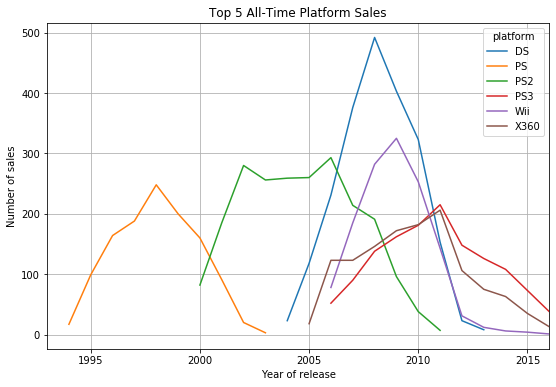

In [21]:
#pivot table to organize the data for the distribution
top_plat_pivot = top_platforms.pivot_table(index = 'year_of_release', 
                                           columns = 'platform', 
                                          values = 'total_sales',
                                          aggfunc = 'count')


ax = top_plat_pivot.plot(kind='line', figsize=(9,6), grid=True)
ax.set_ylabel('Number of sales')
ax.set_xlabel('Year of release')
ax.set_xlim(1993, 2016)
ax.set_title('Top 5 All-Time Platform Sales')

plt.show()

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Such an incredible graph!
</div>

**Conclusion 3.2: Top 5 platform sale lifespan**

1) The graph shows that it takes about 5 years for a new platform to appear and 10 years for one to die out in sales

2) The platforms with the highest amount numer of sales in a given year were the DS and the Wii. Both came out at the same time and had a shorter lifespan compared to PS2

3) The Xbox 360 had a similar lifespan as the PS2 at about 10 years but had less game sale revenue and was introduced later than the PS2. This could be explained by games having longer lifespans through the newer concept of paid DLC, where a player does not need to keep purchasing new games to keep enjoying the console

4) A platform generally appears to be most profitable during the middle of its' lifespan

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Absolutely correct!
</div>

#### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

1) Since the goal is to build a forecast for bestselling games in 2017, the period of time that should be analyzed should be current

2) According to sales lifespan chart:

-platforms generally appear every 5 years

-platforms die every 10 years

-they are most profitable after about 5 years since the platform has been released

3) The key period for analyzing data are games released in the last **5 years** where certain platforms may be in their prime or are trending upwards toward their prime (PS4, xbox one, 3DS, WiiU, PC) -- these platforms were chosen since they came out recently in the last 5 years -- PC has been relevant for a long time so it is kept in

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: I would do the same!
</div>

#### Disregard the data for previous years.

In [22]:
games_5years = games.query('year_of_release in ("2012", "2013", "2014", "2015", "2016")')

games_5years['platform'].value_counts()

PS3     493
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: platform, dtype: int64

#### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [23]:
#first filter for the most potentially profitable platforms (PS4, xbox one, 3DS, WiiU, PC)
#PSV and PS3 are added in since they have the highest sales among all platforms in the last 
#5 years

top_5yr = games_5years[(games_5years['platform'].isin(['PS4', 'XOne', '3DS', 
                                                       'WiiU', 'PC', 'PS3', 'PSV']))]

display(top_5yr['platform'].value_counts(), top_5yr.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 16 to 16714
Data columns (total 12 columns):
name               2336 non-null object
platform           2336 non-null object
year_of_release    2336 non-null int64
genre              2336 non-null object
na_sales           2336 non-null float64
eu_sales           2336 non-null float64
jp_sales           2336 non-null float64
other_sales        2336 non-null float64
critic_score       2336 non-null float64
user_score         2336 non-null float64
rating             2336 non-null object
total_sales        2336 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 237.2+ KB


PS3     493
PSV     411
3DS     396
PS4     392
PC      250
XOne    247
WiiU    147
Name: platform, dtype: int64

None

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Great choices!
</div>

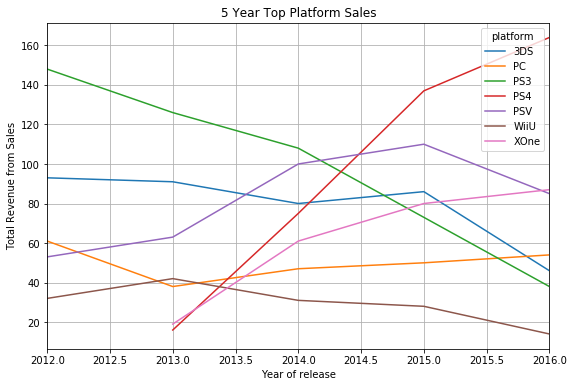

In [24]:
#Next, pivot the data and make a graph
#pivot table to organize the data for the distribution

top_5yr_pivot = top_5yr.pivot_table(index = 'year_of_release',
                                   columns = 'platform',
                                   values = 'total_sales',
                                   aggfunc = 'count')

ax = top_5yr_pivot.plot(kind='line', figsize=(9,6), grid=True)
ax.set_ylabel('Total Revenue from Sales')
ax.set_xlabel('Year of release')
ax.set_title('5 Year Top Platform Sales')
plt.show()

**Conclusion 3.3: 5 Year Top Platform Sales**

1) The platforms that are currently at their prime or reaching them are the PS4 and XOne, with PS4 outperforming XOne doubling them in sales (160mil vs. 90mil)

2) PC games saw a dip initially in 2012, but rebounded after 2 years and is steadily gaining in sales 

3) The consoles that are on a downward slope for sales are the PSV, WiiU, 3DS, and PS3. It is no surprise that the PS3 is declining since its' next gen relative is replacing it.

4) In regards to the WiiU, it is the worst peforming platform. It is expected that the newer console would begin to beat its' predecesor, the 3DS in sales, but even as the 3DS declines in sales at 2015, it still beats the WiiU in games sold.



<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Correct!
</div>

#### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


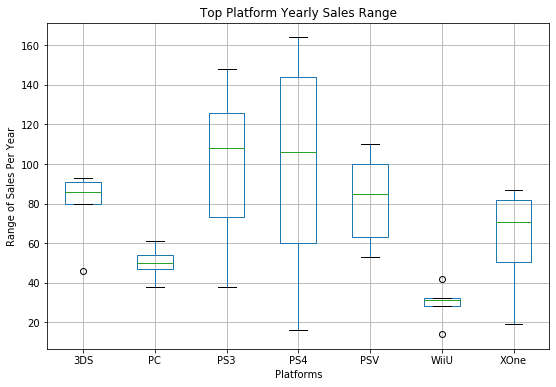

platform,3DS,PC,PS3,PS4,PSV,WiiU,XOne
count,5.000000,5.000000,5.000000,4.00000,5.00000,5.000000,4.000000
mean,79.200000,50.000000,98.600000,98.00000,82.20000,29.400000,61.750000
std,19.227584,8.514693,43.609632,66.15638,24.07696,10.089599,30.543685
min,46.000000,38.000000,38.000000,16.00000,53.00000,14.000000,19.000000
25%,80.000000,47.000000,73.000000,60.25000,63.00000,28.000000,50.500000
50%,86.000000,50.000000,108.000000,106.00000,85.00000,31.000000,70.500000
75%,91.000000,54.000000,126.000000,143.75000,100.00000,32.000000,81.750000
max,93.000000,61.000000,148.000000,164.00000,110.00000,42.000000,87.000000


In [25]:
ax = top_5yr_pivot.plot(kind='box', figsize=(9,6), grid=True)
ax.set_ylabel('Range of Sales Per Year')
ax.set_xlabel('Platforms')
ax.set_title('Top Platform Yearly Sales Range')
plt.show()
display(top_5yr_pivot.describe())

**Conclusion 3.4: Top Platform Yearly Sales Range**

1) This graph shows that the top platforms in sales over the last 5 years (PS4, PS3, and PSV) generally have a large distribution and a higher average of sales compared to the rest

2) The highest average was a tie between PS3 and PS4 at 98 while the lowest average was the was WiiU at 29.4

3) Platforms such as the 3DS and PC have one of the lowest spreads (19.2 and 8.5 STD respectivly) however, they are not necessarily underperforming. The 3DS achieved a higher maximum of 93mil games sold compared to the XOne at 87 and a higher average of 79.2 compared to XOne's 61.7.

4) This range in sales help describe which platforms are performing better than others when comparing the average and which platforms are on a potential rise or decline by analyzing the distribution.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Absolutely correct!
</div>

#### Take a look at how user and professional reviews affect sales for one popular platform (XOne). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [26]:
#First create a df with only XOne platform games
xone_games = top_5yr[(top_5yr['platform'].isin(['XOne']))]
xone_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,66.0,7.5,E,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


In [27]:
#Next, drop all columns not pertaining to review and sales correlation
xone_games = xone_games.drop(['name', 'platform', 'year_of_release', 'genre', 'rating'], axis=1)
display(xone_games.head(), xone_games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16672
Data columns (total 7 columns):
na_sales        247 non-null float64
eu_sales        247 non-null float64
jp_sales        247 non-null float64
other_sales     247 non-null float64
critic_score    247 non-null float64
user_score      247 non-null float64
total_sales     247 non-null float64
dtypes: float64(7)
memory usage: 15.4 KB


,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
99,4.59,2.11,0.01,0.68,66.0,7.5,7.39
165,2.81,2.19,0.00,0.47,97.0,7.9,5.47
179,3.22,1.55,0.01,0.48,81.0,5.4,5.26
242,2.78,1.27,0.03,0.41,84.0,6.4,4.49
270,2.51,1.32,0.01,0.38,88.0,6.2,4.22


None

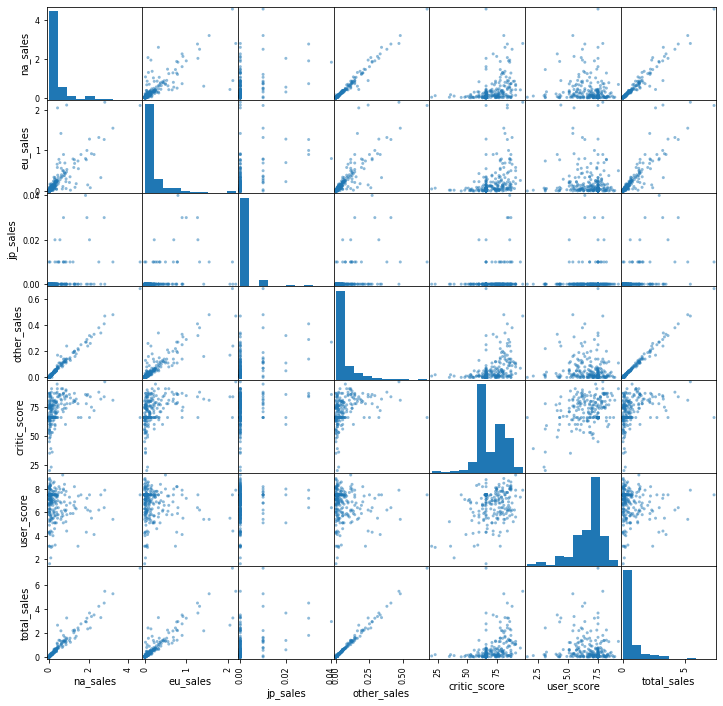

None

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
na_sales,1.000000,0.765367,0.425725,0.988088,0.358024,-0.104990,0.970433
eu_sales,0.765367,1.000000,0.421071,0.852986,0.366701,-0.092550,0.898045
jp_sales,0.425725,0.421071,1.000000,0.441717,0.211757,0.037641,0.452701
other_sales,0.988088,0.852986,0.441717,1.000000,0.377078,-0.105520,0.995238
critic_score,0.358024,0.366701,0.211757,0.377078,1.000000,0.293191,0.382530
user_score,-0.104990,-0.092550,0.037641,-0.105520,0.293191,1.000000,-0.105937
total_sales,0.970433,0.898045,0.452701,0.995238,0.382530,-0.105937,1.000000


In [28]:
#Next, create scatter matrix and correlation matrix
pd.plotting.scatter_matrix(xone_games, figsize=(12,12))
display(plt.show(), xone_games.corr())

**Conclusion 3.5: Review and Sales Scatter Matrices and Correlation**

1) Both critic_score and user_score had a weak influence on total sales, both have denser values leaning to the right of each graph that get taller, but less dense. This shows that games with higher critic and user reviews may get more sales, but since the values are still more dense at the bottom of each graph, the reviews do not necessarily control the sales. This can also be seen in the correlation matrix with critic score having a coefficient of 0.38 and user score having a score of -0.1. This means that critic score has a stronger relationship with total sales than user_score. 

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: I couldn't agree more!
</div>

#### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

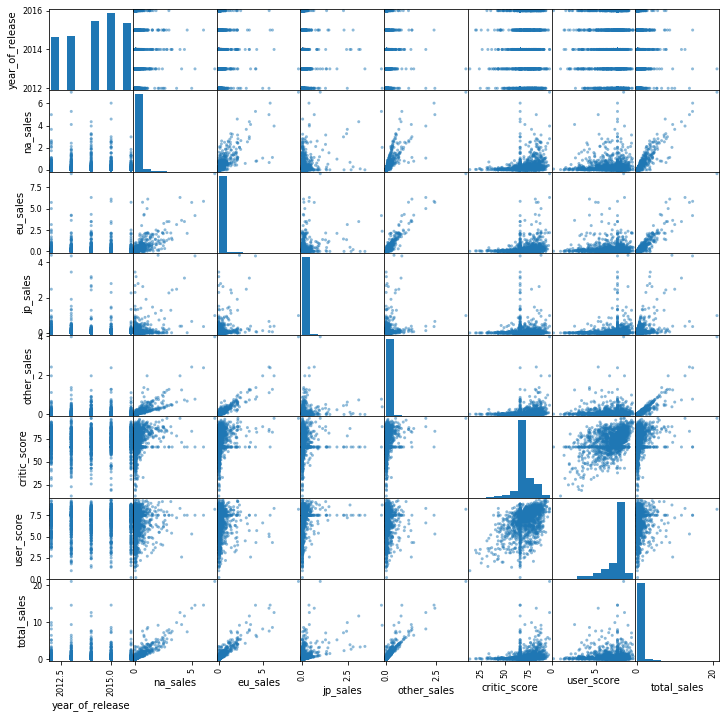

None

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.087966,-0.066463,-0.087543,-0.079419,-0.020816,0.009378,-0.092975
na_sales,-0.087966,1.000000,0.788698,0.353261,0.830587,0.303162,-0.064466,0.924787
eu_sales,-0.066463,0.788698,1.000000,0.284816,0.939205,0.286348,-0.081949,0.932207
jp_sales,-0.087543,0.353261,0.284816,1.000000,0.210768,0.054947,0.110113,0.502823
other_sales,-0.079419,0.830587,0.939205,0.210768,1.000000,0.278199,-0.070351,0.915915
critic_score,-0.020816,0.303162,0.286348,0.054947,0.278199,1.000000,0.319518,0.293204
user_score,0.009378,-0.064466,-0.081949,0.110113,-0.070351,0.319518,1.000000,-0.047124
total_sales,-0.092975,0.924787,0.932207,0.502823,0.915915,0.293204,-0.047124,1.000000


In [29]:
#scatter matrix for the top_5yr dataframe that includes the rest of the platforms

pd.plotting.scatter_matrix(top_5yr, figsize=(12,12))
display(plt.show(), top_5yr.corr())

**Conclusion 3.6: Multi-Platform Review and Sales Scatter and Correlation**

1) When all other platforms were considered, critic_score and user_score still had a weak relationship with total_sales. The graphs appear to be very similar with high density below the each graph that get taller towards the right but less dense, showing that good reviews had a small, yet positive effect on sales across multiple platforms.

2) This can also be seen in the correlation matrix where the old coefficients for critic and user score (0.38 and -0.1 respectively) are still very similar to the new coefficients (0.29 and -0.04 respectively). The decrease in the correlation coefficient for critic reviews show that there is a small difference in critic review effects amongst different platforms.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Incredible!
</div>

#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

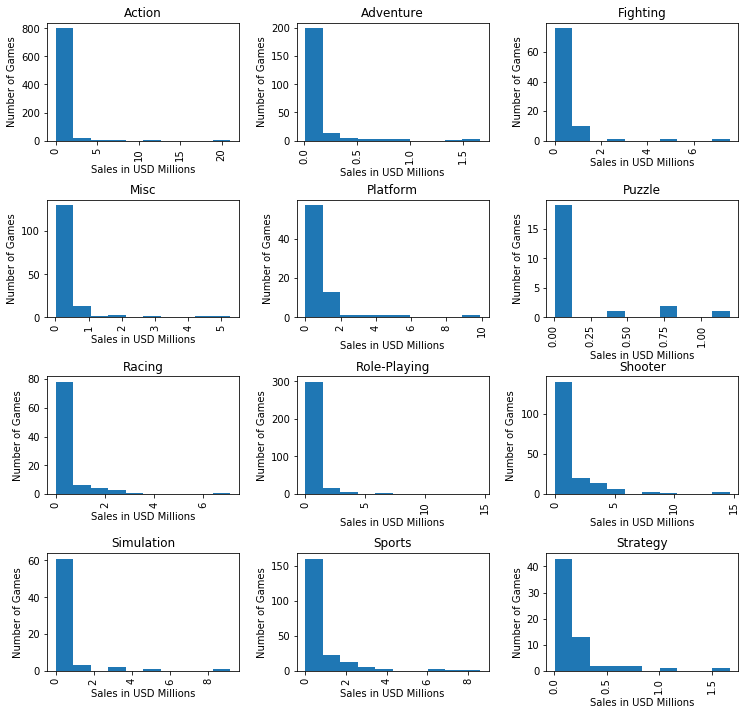

None

Action          830
Role-Playing    323
Adventure       229
Sports          205
Shooter         186
Misc            151
Racing           93
Fighting         89
Platform         75
Simulation       68
Strategy         64
Puzzle           23
Name: genre, dtype: int64

In [31]:
axarr = top_5yr.hist(by='genre', column='total_sales', grid= True, figsize=(12,12))
for ax in axarr.flatten():
    ax.set_xlabel("Sales in USD Millions")
    ax.set_ylabel("Number of Games")
    
display(plt.show(), top_5yr['genre'].value_counts())


<div class="alert alert-danger" style="box-shadow: 4px 4px 4px">
    <s>Need fixing: Please label all of the graphs. </s>
</div>

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Perfect!
</div>

**Conclusion 3.7: Sales Distribution by Genre**

1) The most lucrative game genres were action and shooters considering they had some games that brought in total sales resulting 20mil and 15mil.

2) Action games highest in production with 830 games and 343mil total sales. With most games achieving sales between 0mil and 5mil, action games are a safe genre to develop but few of them become very lucrative.

3) Racing, simulation, shooters, and sports are all noteworthy genres when comparing how many games were produced in the genre and how many became lucrative. 

4) Only 93 racing games developed, however, they had achieved sales of up to 7mil total sales revenue. 

5) Only 186 shooter games were developed, however, they had achieved sales of up to 15mil total sales

6) Only 68 simulation games were developed, however, they had achieved sales of up to 8mil total sales

7) 205 sports games were developed, however, they had achieved sales of up to 8 mil

8) Action games may have been the highest in production and highest in total sales however, it is an overly saturated genre. The chances of finding a game that makes it big are game genres that are lower in production and achieve high total sales volume, such as racing, shooters, simulation, and sports games

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Everything is perfect!
</div>

# Step 4: Create a user profile for each region

#### For each region (NA, EU, JP), determine: The top five platforms. Describe variations in their market shares from region to region.

In [32]:
na_platforms = top_5yr.groupby('platform')['na_sales'].sum()
na_platforms.sort_values(ascending=False)

platform
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
WiiU     38.10
PC       19.12
PSV      10.98
Name: na_sales, dtype: float64

In [33]:
eu_platforms = top_5yr.groupby('platform')['eu_sales'].sum()
eu_platforms.sort_values(ascending=False)

platform
PS4     141.09
PS3     106.86
XOne     51.59
3DS      42.64
PC       37.76
WiiU     25.13
PSV      11.36
Name: eu_sales, dtype: float64

In [34]:
jp_platforms = top_5yr.groupby('platform')['jp_sales'].sum()
jp_platforms.sort_values(ascending=False)

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
XOne     0.34
PC       0.00
Name: jp_sales, dtype: float64

**Conclusion 4.1: Top Platforms for NA, EU, and JP**

1) NA and EU shared the same top 5 platforms (PS4, PS3, XOne, 3DS, PC) but varied in market share.

2) PS4 and PS3 game sales were higher in EU (141 and 106 compared to 108 and 103 respectively), but XOne sales were higher in NA (93) compared to EU (51). 

3) The WiiU was most popular in NA (38) and least popular in JP (13).

4) PC was more popular in EU (37) compared to NA (19) and least in JP (0).


<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Absolutely correct!
</div>

#### The top five genres. Explain the difference.

In [35]:
na_platforms['genre'] = top_5yr.groupby('genre')['na_sales'].sum()
eu_platforms['genre'] = top_5yr.groupby('genre')['eu_sales'].sum()
jp_platforms['genre'] = top_5yr.groupby('genre')['jp_sales'].sum()

na_platforms['genre'].sort_values(ascending=False)

genre
Action          125.38
Shooter         100.07
Sports           57.37
Role-Playing     54.59
Platform         22.72
Misc             19.62
Fighting         16.60
Racing           13.91
Adventure         6.95
Simulation        6.85
Strategy          3.56
Puzzle            1.13
Name: na_sales, dtype: float64

In [36]:
eu_platforms['genre'].sort_values(ascending=False)

genre
Action          126.63
Shooter          92.18
Sports           57.68
Role-Playing     43.97
Racing           23.01
Platform         19.44
Misc             15.63
Simulation       14.00
Fighting          9.58
Adventure         8.23
Strategy          4.77
Puzzle            1.31
Name: eu_sales, dtype: float64

In [37]:
jp_platforms['genre'].sort_values(ascending=False)

genre
Role-Playing    57.92
Action          48.21
Misc            11.31
Simulation      10.22
Fighting         8.92
Shooter          8.71
Platform         8.63
Sports           6.90
Adventure        6.52
Racing           2.44
Strategy         2.17
Puzzle           1.48
Name: jp_sales, dtype: float64

**Conclusion 4.2: Top 5 Genres per Region**

1) The top 5 genres for EU and NA are the same except for the 5th place genre. 1 through 4 are action, shooters, sports, and role-playing. 5th place goes to platform in NA and racing for EU.

2) JP's top 5 genres are a bit different: role-playing, action, misc, simulation, and fighting were the most popular

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Correct!
</div>

#### Do ESRB ratings affect sales in individual regions?

In [38]:
na_platforms['rating'] = top_5yr.groupby('rating')['na_sales'].sum()
na_platforms['rating'].sort_values(ascending=False)

rating
E       171.85
M       157.17
T        51.94
E10+     47.79
Name: na_sales, dtype: float64

In [39]:
eu_platforms['rating'] = top_5yr.groupby('rating')['eu_sales'].sum()
eu_platforms['rating'].sort_values(ascending=False)

rating
E       175.82
M       156.31
T        45.65
E10+     38.65
Name: eu_sales, dtype: float64

In [40]:
jp_platforms['rating'] = top_5yr.groupby('rating')['jp_sales'].sum()
jp_platforms['rating'].sort_values(ascending=False)

rating
E       119.98
T        25.48
M        20.12
E10+      7.85
Name: jp_sales, dtype: float64

**Conclustion 4.3: Rating's Influence on Sales per Region**

1) NA and EU shared the same sales ranking based on rate: E, M, T, E10+. They differ for T and E10+ where T was greater in NA (51 vs 45) and also E10+ (47 vs 38).

2) JP had a different rating effect on sales: E, T, M, E10+. T rated games were more profitable than M rated games (25 vs 20).

3) Across all regions, E rated games were most profitable since it is catered to a larger audience than other ratings

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: I would say the same!
</div>

# Step 5: Test the following hypotheses:

**1st Test:**

**Alt. Hypothesis: Average user ratings of the Xbox One and PC platforms are the same.**

**Null Hypothesis: Average user ratings of the Xbox One and PC platforms are not the same.**

In [41]:
#First create two populations: Xbox One and PC and then include only user_ratings
xbox_one = top_5yr.loc[top_5yr['platform'] == 'XOne']
xbox_one = xbox_one.drop(['name', 'platform', 'year_of_release', 
                          'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 
                          'critic_score', 'rating', 'total_sales'], axis=1)
xbox_one.head()

,user_score
99,7.5
165,7.9
179,5.4
242,6.4
270,6.2


In [42]:
pc = top_5yr.loc[top_5yr['platform'] == 'PC']
pc = pc.drop(['name', 'platform', 'year_of_release', 
                          'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 
                          'critic_score', 'rating', 'total_sales'], axis=1)
pc.head()

,user_score
192,4.0
458,3.9
688,7.9
959,4.8
1095,7.9


In [43]:
from scipy import stats as st

alpha = 0.05 #most understood and accepted alpha value

results = st.ttest_ind(xbox_one, pc)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value:  [0.20535911]
We can't reject the null hypothesis


**Conclusion 5.1: Xbox One and PC user ratings t-test**

1) The results of the test show that the p-value is greater than the alpha value (0.21 > 0.05) This means that the the null hypothesis is accepted and the alt. hypothesis is rejected. The average user rating for Xbox One and PC is not the same. 

**2nd Test:**

**Alt. Hypothesis: Average user ratings for the Action and Sports genres are different.**

**Null. Hypothesis: Average user ratings for the Action and Sports genres are not different**

In [44]:
top_5yr['genre'].value_counts()

Action          830
Role-Playing    323
Adventure       229
Sports          205
Shooter         186
Misc            151
Racing           93
Fighting         89
Platform         75
Simulation       68
Strategy         64
Puzzle           23
Name: genre, dtype: int64

In [45]:
#First create two populations: Action and Sports, only include the user_score
action = top_5yr.loc[top_5yr['genre'] == 'Action']
action = action.drop(['name', 'platform', 'year_of_release', 
                          'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 
                          'critic_score', 'rating', 'total_sales'], axis=1)
action.head()

,user_score
16,8.2
42,8.3
81,6.6
127,6.9
149,9.1


In [46]:
sports = top_5yr.loc[top_5yr['genre'] == 'Sports']
sports = sports.drop(['name', 'platform', 'year_of_release', 
                          'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 
                          'critic_score', 'rating', 'total_sales'], axis=1)
sports.head()

,user_score
77,4.3
94,5.0
126,4.3
143,5.7
264,4.5


In [47]:
alpha = 0.05 #most understood and accepted alpha value

results = st.ttest_ind(action, sports)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value:  [2.85891149e-32]
We reject the null hypothesis


**Conclusion 5.2: Action and Sports User Review T-test**

1) The results of the t-test show that the pvalue is much smaller than the alpha (2.85e-32 < 0.05). This means the null hypothesis is rejected and the alt hypothesis is accepted. Therefore, average user ratings for the Action and Sports genres are different.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: This part is flawless!
</div>

# General Conclusion

1) In order to forecast 2017 game sales performance, it is important to realize that only the most relevant platforms and games should be analyzed, therefore only games released in the last 5 years were analyzed

2) The main platforms that should be focused on are PS4 and Xbox One since their graphs showed they were trending towards their prime sales output. Other platforms, such as the 3DS, are downtrending and outlived their prime sales output.

3) Out of all the action and shooter games that are released, only a few become very popular and lucrative. Games to be sold should follow game series that are already established or have a lot positive community engagement about. 

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Success: Such a professional conclusion!
</div>